## Import and Read Dataset

In [7]:
import pandas as pd
import numpy as np

import re
import matplotlib.pyplot as plt

In [8]:
# Dataset Mentah

dataset_raw_df = pd.read_csv ("../Dataset/Indonesian News Dataset.csv")
dataset_raw_df

,id,source,title,image,url,content,date,embedding,created_at,updated_at,summary
0,83,tempo,"Depo Plumpang Terbakar, Anggota DPR Minta Pert...",https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698528/depo-pl...,"TEMPO.CO, Jakarta - Anggota Komisi VII DPR RI ...",2023-03-04 06:18:13+00,"[-0.01590039,-0.034130897,0.005732614,-0.01853...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,Anggota Komisi VII DPR RI Rofik Hananto menyay...
1,84,tempo,Jokowi Perintahkan Wapres Ma'ruf Amin Tinjau L...,https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698522/jokowi-...,"TEMPO.CO, Jakarta - Presiden Joko Widodo atau ...",2023-03-04 06:04:38+00,"[-0.017608976,-0.021786924,0.01547983,-0.00932...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,Presiden Joko Widodo telah memerintahkan Wakil...
2,85,tempo,HNW Mendukung Jamaah Umroh First Travel Dapatk...,https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698527/hnw-men...,INFO NASIONAL - Wakil Ketua MPR RI Dr. H. M. H...,2023-03-04 06:18:04+00,"[0.00841488,-0.023665192,0.006762431,-0.013723...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,Wakil Ketua MPR RI Dr. H. M. Hidayat Nur Wahid...
3,86,tempo,Tim Dokkes Polri Telah Terima 14 Kantong Jenaz...,https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698540/tim-dok...,"TEMPO.CO, Jakarta - Tim Kedokteran dan Kesehat...",2023-03-04 06:44:10+00,"[-0.012671886,-0.0039057182,0.019575326,-0.016...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,Tim Kedokteran dan Kesehatan (Dokkes) Polri te...
4,87,tempo,Bamsoet Ajak Komunitas Otomotif Kembangkan Per...,https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698536/bamsoet...,INFO NASIONAL - Ketua MPR RI sekaligus Ketua U...,2023-03-04 06:38:57+00,"[-0.015486176,-0.0125719,-0.0122843925,-0.0343...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,Ketua MPR RI Bambang Soesatyo telah diangkat s...
...,...,...,...,...,...,...,...,...,...,...,...
32730,63563,kumparan,"5 Hewan Aneh yang Hidup di Palung Mariana, Sal...",https://blue.kumparan.com/image/upload/fl_prog...,https://kumparan.com/kumparansains/5-hewan-ane...,menjadi salah satu lubang terdalam dan tergela...,2023-04-11 20:13:25+00,"[0.008977383,-0.018717425,0.004850631,-0.01737...",2023-04-11 20:20:10.989219,2023-04-11 20:20:10.989219,Peneliti berhasil mengungkap sedikit demi sedi...
32731,63564,kumparan,"Biadab! Guru SD di Banyuwangi Cabuli Siswinya,...",https://blue.kumparan.com/image/upload/fl_prog...,https://kumparan.com/kumparannews/biadab-guru-...,Seorang guru SD di Banyuwangi ditangkap oleh p...,2023-04-11 20:05:30+00,"[0.0040081143,-0.0045449445,-0.00012154845,-0....",2023-04-11 20:20:10.989219,2023-04-11 20:20:10.989219,Seorang guru SD di Banyuwangi ditangkap polisi...
32732,63565,kumparan,Aji Santoso: Jakmania Perlakukan Persebaya den...,https://blue.kumparan.com/image/upload/fl_prog...,https://kumparan.com/kumparanbola/aji-santoso-...,"Pelatih , Aji Santoso, salut dengan sambutan s...",2023-04-11 19:37:49+00,"[-0.008314485,-0.012032238,0.0025099716,0.0025...",2023-04-11 20:20:10.989219,2023-04-11 20:20:10.989219,"Pelatih Persebaya, Aji Santoso, menyampaikan s..."
32733,63566,kumparan,Sopir Audi Cium Kaki Ibu & Istri Hamil Usai Si...,https://blue.kumparan.com/image/upload/fl_prog...,https://kumparan.com/kumparannews/sopir-audi-c...,Suasana haru terjadi usai sidang terdakwa Suge...,2023-04-11 19:24:07+00,"[0.01118314,-0.016214557,0.023612533,-0.024195...",2023-04-11 20:20:10.989219,2023-04-11 20:20:10.989219,"Sugeng Guruh Gautama Legiman, terdakwa kasus k..."


## Preprocessing Dataset

In [9]:
# Memilih kolom yang digunakan pada dataset (cuma butuh text sama summary)

dataset_df = dataset_raw_df[["content", "summary"]]
dataset_df

,content,summary
0,"TEMPO.CO, Jakarta - Anggota Komisi VII DPR RI ...",Anggota Komisi VII DPR RI Rofik Hananto menyay...
1,"TEMPO.CO, Jakarta - Presiden Joko Widodo atau ...",Presiden Joko Widodo telah memerintahkan Wakil...
2,INFO NASIONAL - Wakil Ketua MPR RI Dr. H. M. H...,Wakil Ketua MPR RI Dr. H. M. Hidayat Nur Wahid...
3,"TEMPO.CO, Jakarta - Tim Kedokteran dan Kesehat...",Tim Kedokteran dan Kesehatan (Dokkes) Polri te...
4,INFO NASIONAL - Ketua MPR RI sekaligus Ketua U...,Ketua MPR RI Bambang Soesatyo telah diangkat s...
...,...,...
32730,menjadi salah satu lubang terdalam dan tergela...,Peneliti berhasil mengungkap sedikit demi sedi...
32731,Seorang guru SD di Banyuwangi ditangkap oleh p...,Seorang guru SD di Banyuwangi ditangkap polisi...
32732,"Pelatih , Aji Santoso, salut dengan sambutan s...","Pelatih Persebaya, Aji Santoso, menyampaikan s..."
32733,Suasana haru terjadi usai sidang terdakwa Suge...,"Sugeng Guruh Gautama Legiman, terdakwa kasus k..."


In [10]:
# Bersih-bersih kalau ada whitespace atau ada simbol simbol yang aneh

import re

def text_strip(column):
    for row in column:
        
        # Jangan ubah urutan regex

        # Remove escape characters
        row = re.sub(r"(\\t|\\r|\\n|\t|\r|\n)", ' ', str(row)).lower()
        # Remove consecutive occurrences of special characters
        row = re.sub(r"(__+|-+|~+|\++|\.\.+)", ' ', row)
        # Remove various special characters
        row = re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', row)
        # Remove 'mailto:'
        row = re.sub(r"(mailto:)", ' ', row)
        # Remove '\x9*'
        row = re.sub(r"(\\x9\d)", ' ', row)
        # Replace 'INC' followed by numbers with 'INC_NUM'
        row = re.sub(r"([iI][nN][cC]\d+)", 'INC_NUM', row)
        # Replace 'CM' or 'CHG' followed by numbers with 'CM_NUM'
        row = re.sub(r"([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', row)
        # Remove full stop, dash, and colon at the end of words
        row = re.sub(r"(\.\s+|\-\s+|\:\s+)", ' ', row)
        
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces
        
        #Replace any url as such https://abc.xyz.net/browse/sdf-5327 ====> abc.xyz.net
        try:
            url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', str(row))
            repl_url = url.group(3)
            row = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)',repl_url, str(row))
        except:
            pass #there might be emails with no url in them
        
        row = re.sub(r"(pilihan\seditor).*", '', row)
        row = re.sub(r"tempo.co|info\snasional|suara.com", '', str(row)).lower()

        row = re.sub("(\s+)",' ',str(row)).lower() #remove multiple spaces
        
        #Should always be last
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single characters hanging between 2 spaces

        yield row

In [11]:
# Sample input
input_text = "ini adalah contoh teks dengan karakter escape \n dan \t, beberapa spasi, karakter khusus seperti @#$, INC123, CM456, dan CHG789, titik., tanda hubung-, dan titik dua: di akhir kata. ini adalah sebuah tautan: https://contoh.com, dan satu lagi: http://contoh.net/browse/sdf-123. Mungkin ada beberapa email seperti mailto:contoh@contoh.com. Juga, ada beberapa situs web seperti tempo.co, info nasional, dan suara.com. Terakhir, ada beberapa karakter tunggal di antara a spasi."

# Apply the text_strip function to the input text
cleaned_text = next(text_strip([input_text]))

# Print the cleaned text
print(cleaned_text)

ini adalah contoh teks dengan karakter escape dan beberapa spasi karakter khusus seperti @#$ inc_num cm_num dan cm_num titik tanda hubung dan titik dua di akhir kata ini adalah sebuah tautan contoh.c dan satu lagi contoh.c 123 mungkin ada beberapa email seperti contoh@contoh.com juga ada beberapa situs web seperti dan terakhir ada beberapa karakter tunggal di antara spasi.


In [12]:
# Di apply bersih-bersih yang tadi

brief_cleaning1 = text_strip(dataset_df['content'])
brief_cleaning2 = text_strip(dataset_df['summary'])

In [14]:
from time import time
import spacy
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

#Taking advantage of spaCy .pipe() method to speed-up the cleaning process:
#If data loss seems to be happening(i.e len(text) = 50 instead of 75 etc etc) in this cell , decrease the batch_size parametre 

t = time()

#Batch the data points into 5000 and run on all cores for faster preprocessing
text = [str(doc) for doc in nlp.pipe(brief_cleaning1, batch_size=5000)]

#Takes 7-8 mins
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 4.86 mins


In [16]:
t = time()

#Batch the data points into 5000 and run on all cores for faster preprocessing
summary = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(brief_cleaning2, batch_size=5000)]

#Takes 7-8 mins
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 0.98 mins


In [17]:
dataset_df['cleaned_text'] = pd.Series(text)
dataset_df['cleaned_summary'] = pd.Series(summary)

/tmp/ipykernel_5193/3441996377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['cleaned_text'] = pd.Series(text)
/tmp/ipykernel_5193/3441996377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['cleaned_summary'] = pd.Series(summary)


In [18]:
text[0]

' jakarta anggota komisi vii dpr ri rofik hananto menyayangkan terjadinya insiden kebakaran yang disebabkan oleh bocornya depo plumpang jakarta utara pada jumat maret 2023 turut berbela sungkawa terhadap masyarakat sipil yang terdampak apalagi ini daerah padat penduduk pertamina harus tanggung jawab kata dia dalam keterangan di jakarta sabtu maret 2024.rofik mengatakan pertamina serta pihak terkait harus memastikan keselamatan dan keamanan warga yang tinggal di sekitar lokasi.pipa bbm yang terbakar itu merupakan bagian dari terminal bahan bakar minyak tbbm plumpang tbbm plumpang dinilai sebagai salah satu terminal bbm terpenting di indonesia sehingga rofik juga menegaskan pertamina harus memastikan pasokan bahan bakar minyak tetap aman meski ada insiden tersebut plumpang menyuplai sekitar 20 persen kebutuhan bbm harian di indonesia atau sekitar 25 persen dari total kebutuhan spbu pertamina maka tindakan selanjutnya adalah bagaimana memastikan suplai bbm tidak terganggu katanya.rofik ju

In [19]:
summary[0]

'_START_ anggota komisi vii dpr ri rofik hananto menyayangkan terjadinya insiden kebakaran di depo plumpang jakarta utara pada jumat maret 2023 rofik menegaskan pertamina harus memastikan pasokan bahan bakar minyak tetap aman meski ada insiden tersebut depo plumpang merupak _END_'

In [20]:
# Menghitung panjang text & summary

text_count = []
summary_count = []

for sent in dataset_df['cleaned_text']:
    text_count.append(len(sent.split()))
for sent in dataset_df['cleaned_summary']:
    summary_count.append(len(sent.split()))

In [21]:
graph_df= pd.DataFrame()
graph_df['text']=text_count
graph_df['summary']=summary_count

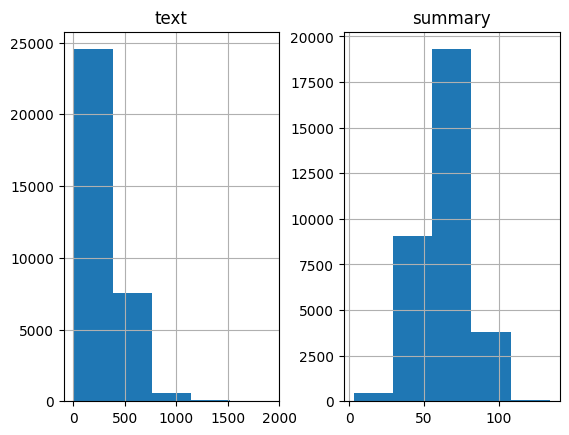

In [22]:
import matplotlib.pyplot as plt

graph_df.hist(bins = 5)
plt.show()

In [23]:
# Dari graph kelihatan kalo mayoritas summary tuh ada di rentan 100 kata
# Check how much % of summary have 0-100 words

cnt=0
for i in dataset_df['cleaned_summary']:
    if(len(i.split())<=85):
        cnt=cnt+1
print("% of Text that have 0 - 85 word = ", (round(cnt/len(dataset_df['cleaned_summary']) * 100, 2)), "%")

% of Text that have 0 - 85 word =  93.24 %


In [24]:
# Dari graph kelihatan kalo mayoritas text tuh ada di rentan 512 kata
# Check how much % of text have 0-512 words

cnt=0
for i in dataset_df['cleaned_text']:
    if(len(i.split())<=512):
        cnt=cnt+1
print("% of Text that have 0 - 512 word = ", (round(cnt/len(dataset_df['cleaned_text']) * 100, 2)), "%")

% of Text that have 0 - 512 word =  90.5 %


In [25]:
# Model to summarize the text between 0-100 words for Summary and 0-512 words for Text
# Diset max nya untuk buang outlier

max_text_len=512
max_summary_len=85

In [26]:
# Select the Summaries and Text between max len defined above

cleaned_text =np.array(dataset_df['cleaned_text'])
cleaned_summary=np.array(dataset_df['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre=pd.DataFrame({'text':short_text,'summary':short_summary})

In [27]:
post_pre

,text,summary
0,jakarta anggota komisi vii dpr ri rofik hanan...,_START_ anggota komisi vii dpr ri rofik hanant...
1,jakarta presiden joko widodo atau jokowi meme...,_START_ presiden joko widodo telah memerintahk...
2,wakil ketua mpr ri dr hidayat nur wahid ma at...,_START_ wakil ketua mpr ri dr hidayat nur wahi...
3,jakarta tim kedokteran dan kesehatan dokkes p...,_START_ tim kedokteran dan kesehatan dokkes po...
4,ketua mpr ri sekaligus ketua umum ikatan moto...,_START_ ketua mpr ri bambang soesatyo telah di...
...,...,...
28002,menjadi salah satu lubang terdalam dan tergela...,_START_ peneliti berhasil mengungkap sedikit d...
28003,seorang guru sd di banyuwangi ditangkap oleh p...,_START_ seorang guru sd di banyuwangi ditangka...
28004,pelatih aji santoso salut dengan sambutan saat...,_START_ pelatih persebaya aji santoso menyampa...
28005,suasana haru terjadi usai sidang terdakwa suge...,_START_ sugeng guruh gautama legiman terdakwa ...


In [69]:
# post_pre = post_pre[post_pre['text'] != 'nan']
# post_pre = post_pre[post_pre['summary'] != '_START_ nan _END_']

In [29]:
post_pre.to_csv('../Dataset/Indonesian News Dataset Preprocessed.csv', index=False)

In [30]:
post_pre = pd.read_csv ('../Dataset/Indonesian News Dataset Preprocessed.csv', encoding='iso-8859-1')

In [31]:
post_pre = post_pre.dropna()
post_pre

,text,summary
0,jakarta anggota komisi vii dpr ri rofik hanan...,_START_ anggota komisi vii dpr ri rofik hanant...
1,jakarta presiden joko widodo atau jokowi meme...,_START_ presiden joko widodo telah memerintahk...
2,wakil ketua mpr ri dr hidayat nur wahid ma at...,_START_ wakil ketua mpr ri dr hidayat nur wahi...
3,jakarta tim kedokteran dan kesehatan dokkes p...,_START_ tim kedokteran dan kesehatan dokkes po...
4,ketua mpr ri sekaligus ketua umum ikatan moto...,_START_ ketua mpr ri bambang soesatyo telah di...
...,...,...
28002,menjadi salah satu lubang terdalam dan tergela...,_START_ peneliti berhasil mengungkap sedikit d...
28003,seorang guru sd di banyuwangi ditangkap oleh p...,_START_ seorang guru sd di banyuwangi ditangka...
28004,pelatih aji santoso salut dengan sambutan saat...,_START_ pelatih persebaya aji santoso menyampa...
28005,suasana haru terjadi usai sidang terdakwa suge...,_START_ sugeng guruh gautama legiman terdakwa ...


In [32]:
post_pre.to_csv('../Dataset/Indonesian News Dataset Preprocessed.csv', index=False)